# Dataset
In this notebook, we present several examples from a synthetically constructed multimodal dataset featuring aligned audio, text, and image modalities.
The objective behind this dataset was to support research in cross-modal learning, where a shared representation can be learned from different types of input.

To build such a dataset, we began with the [AudioCaps dataset](https://audiocaps.github.io/), which provides natural audio recordings annotated with human-written captions. From these captions, we generated corresponding images via Distilled Stable Diffusion. The result is a fully aligned triplet: each data point consists of an audio waveform, a descriptive caption, and a synthetically generated image.


In [4]:
import os
from PIL import Image
from pathlib import Path
import random 
import json
from IPython.display import display, Audio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
# Randomly sample 10 datapoint
def sample_files(folder_path, k, seed=None):
    """
    Randomly sample k filenames from a folder.

    Args:
        folder_path (str): Path to the folder
        k (int): Number of files to sample
        seed (int, optional): Random seed for reproducibility

    Returns:
        List[str]: List of sampled file names (not full paths)
    """
    if seed is not None:
        random.seed(seed)

    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    if k > len(files):
        raise ValueError(f"Requested k={k}, but only {len(files)} files available.")
    
    # Remove extensions
    base_names = [os.path.splitext(f)[0] for f in files]

    return random.sample(base_names, k)


def retrieve_files_by_id(ids, image_dir, caption_dir, audio_dir, verbose=True):
    """
    Given a list of IDs, retrieve corresponding .png, .json, and .wav files from the respective folders.

    Args:
        ids (List[str|int]): List of base file names (without extension)
        image_dir (str): Path to image directory (.png)
        caption_dir (str): Path to caption directory (.json)
        audio_dir (str): Path to audio directory (.wav)
        verbose (bool): If True, print missing files

    Returns:
        List[Dict[str, str]]: List of dicts with keys: id, image, caption, audio
    """
    results = []

    for id_ in ids:
        id_str = str(id_)

        img_path = os.path.join(image_dir, f"{id_str}.png")
        cap_path = os.path.join(caption_dir, f"{id_str}.json")
        aud_path = os.path.join(audio_dir, f"{id_str}.wav")

        missing = []
        for path, kind in [(img_path, "image"), (cap_path, "caption"), (aud_path, "audio")]:
            if not os.path.isfile(path):
                missing.append(kind)

        if missing:
            if verbose:
                print(f"Missing {', '.join(missing)} file(s) for ID: {id_str}")
            continue

        results.append({
            "id": id_str,
            "image": img_path,
            "caption": cap_path,
            "audio": aud_path
        })

    return results


def display_triplets(samples, max_display=5):
    """
    Display image, caption text, and play audio for each sample in a list.

    Args:
        samples (List[Dict]): List of dicts with keys: id, image, caption, audio
        max_display (int): Limit number of samples to display
    """
    for i, sample in enumerate(samples[:max_display]):
        print(f"\n=== ID: {sample['id']} ===")

        # 1. Caption text
        try:
            with open(sample['caption'], 'r') as f:
                caption_data = json.load(f)
            print("Caption:", caption_data.get("text", caption_data))
        except Exception as e:
            print("Error reading caption:", e)

        # 2. Image
        try:
            img = mpimg.imread(sample['image'])
            plt.imshow(img)
            plt.axis('off')
            plt.title("Image")
            plt.show()
        except Exception as e:
            print("Error loading image:", e)

        # 3. Audio
        try:
            display(Audio(sample['audio']))
        except Exception as e:
            print("Error loading audio:", e)




=== ID: 49066 ===
Caption: Water runs and a man speaks


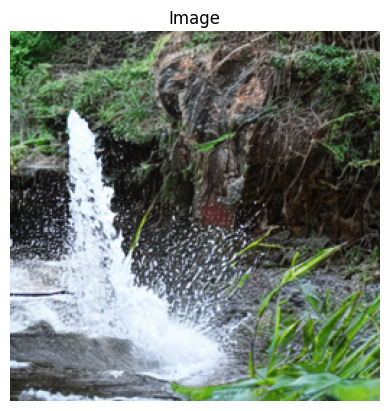


=== ID: 12065 ===
Caption: A chain is jingling followed by dogs barking and yelping then all of a sudden a man is saying something


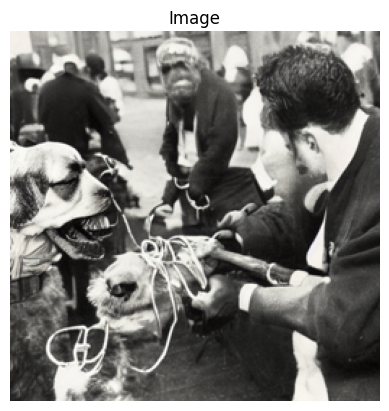


=== ID: 101183 ===
Caption: Several vehicles accelerating and driving by as a person whistles in the distance


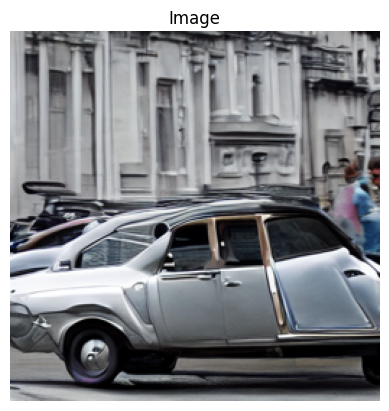

In [6]:
DATASET_PATH = Path("/work/com-304/snoupy/audiocaps/train/")
IMG_PATH = DATASET_PATH / 'images' 
AUDIO_PATH = DATASET_PATH / 'audio'
CAPTION_PATH = DATASET_PATH / 'caption'
SEED = 42
id_list = sample_files(IMG_PATH,k=3,seed = SEED)
dataset = retrieve_files_by_id(id_list,IMG_PATH,CAPTION_PATH,AUDIO_PATH)
display_triplets(dataset)